# Data Exploration for Milestone 1

## The data

The data for the project contains information about different chocolate bars and includes 2733 reviews. The rating scale is defined as follows:

- 4.0 - 5.0 = Outstanding
- 3.5 - 3.9 = Highly Recommended
- 3.0 - 3.4 = Recommended
- 2.0 - 2.9 = Disappointing
- 1.0 - 1.9 = Unpleasant


It is stored in two csv files. The dataframes available have been downloaded and stored [here](./data/). What follows is a brief description of the fields in the two dataframes.

[Chocolate makers](data/chocolate_makers.csv):

- `COMPANY NAME`: Company that produces the chocolate bar.


- `CITY`: City where the company is based.


- `STATE/PROVINCE`: State or province where the company is based.


- `OWNER/MAKER`: Company owner(s).


- `COUNTRY`: Country where the company is based in.



[Chocolate ratings](data/chocolate_ratings.csv):

- `REF`: ID.


- `Company (Manufacturer)`: Company that produces the chocolate bar.


- `Company Location`: Country where the company is located.


- `Review Date`: Date of the review.


- `Country of Bean Origin`: Country where the beans where produced.


- `Specific Bean Origin or Bar Name`: Batch information of the beans.


- `Cocoa Percent`: Percentage of cocoa in the chocolate bar.


- `Ingredients`: Other relevant ingredients present.


- `Most Memorable Characteristics`: Reviewers most memorable taste experiences in the review.


- `Rating`: Chocolate rating.


In [141]:
# imports
 
import pandas_profiling as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import plotly.graph_objects as go

%matplotlib inline

In [144]:
# loading the dataframes

makers = pd.read_csv('data/chocolate_makers.csv')
ratings = pd.read_csv('data/chocolate_ratings.csv')

print('The first dataframe contains', makers.shape[0], 'and ', makers.shape[1], 'columns. \nThe columns are: ', list(makers.columns))
print('The second dataframe contains', ratings.shape[0], 'and ', ratings.shape[1], 'columns. \nThe columns are: ', list(ratings.columns))

# merging the two dataframes on the company name
df = makers.merge(ratings, right_on='Company (Manufacturer)', left_on='COMPANY NAME', how='inner')
print('The merged dataframe has the following shape:', df.shape)

The first dataframe contains 373 and  5 columns. 
The columns are:  ['COMPANY NAME', 'CITY', 'STATE/PROVINCE', 'OWNER/MAKER', 'COUNTRY']
The second dataframe contains 2530 and  10 columns. 
The columns are:  ['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date', 'Country of Bean Origin', 'Specific Bean Origin or Bar Name', 'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics', 'Rating']
The merged dataframe has the following shape: (934, 15)


In [147]:
# How many companies do we have?

print('In the makers dataframe we have', makers['COMPANY NAME'].nunique(), 'unique companies, all based on US and Canada')
print('In the ratings dataframe we have', ratings['Company (Manufacturer)'].nunique(), 'unique companies, based all over the world')
print('There are', df['COMPANY NAME'].nunique(), 'companies in common between the two dataframes')

In the makers dataframe we have 373 unique companies, all based on US and Canada
In the ratings dataframe we have 580 unique companies, based all over the world
There are 170 companies in common between the two dataframes


In [151]:
# We check which columns, if any, contain nan values:

print('The makers dataframes has the following columns with the following nan values:\n', makers.isnull().sum(axis = 0))
print('The ratings dataframes has the following columns with the following nan values:\n', ratings.isnull().sum(axis = 0))


The makers dataframes has the following columns with the following nan values:
 COMPANY NAME      0
CITY              0
STATE/PROVINCE    0
OWNER/MAKER       3
COUNTRY           0
dtype: int64
The ratings dataframes has the following columns with the following nan values:
 REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64


In [44]:
# (OPTIONAL) We can use pandas profiling to have a quick overview of the data
profile_makers = pp.ProfileReport(makers)
profile_makers.to_file(output_file="makers.html")

profile_ratings = pp.ProfileReport(ratings)
profile_ratings.to_file(output_file="ratings.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


### Makers

We now focus on the first dataframe. Mainly, we want to see what is the spatial distribution of the companies.

Text(0.5, 1.0, 'Histogram of Cities distribution')

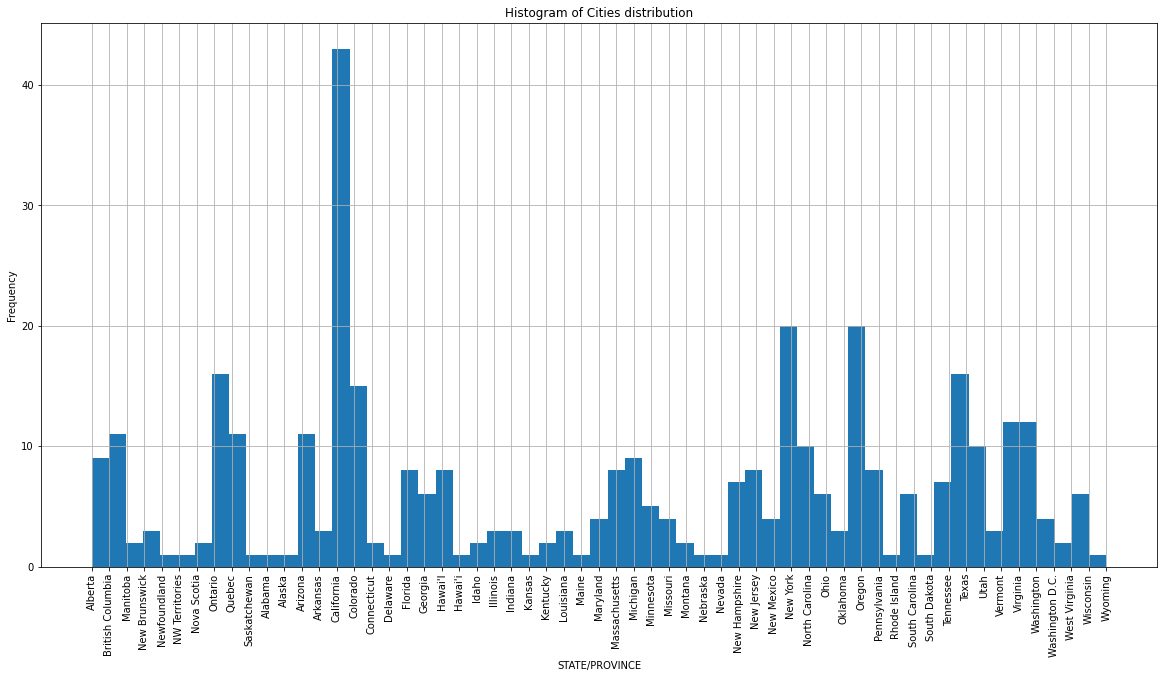

In [152]:
# What is the State/Province distribution?
makers['STATE/PROVINCE'].hist(bins=makers['STATE/PROVINCE'].nunique(), figsize=(20,10))
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.xlabel('STATE/PROVINCE')
plt.title('Histogram of Cities distribution')

In [153]:
# and in terms of countries?
makers['COUNTRY'].value_counts()

US        316
Canada     57
Name: COUNTRY, dtype: int64

In [158]:
# are there any company owners appearing more than once?
makers['OWNER/MAKER'].value_counts()[makers['OWNER/MAKER'].value_counts().apply(lambda x: x > 1)]

Seneca Klassen    2
Joshua Parker     2
Name: OWNER/MAKER, dtype: int64

In [160]:
# what cities appear most often?
makers['CITY'].value_counts()[:10]

New York           14
Portland           12
Montreal            7
Calgary             6
San Francisco       6
Atlanta             5
Denver              5
Seattle             5
Philadelphia        4
Washington D.C.     4
Name: CITY, dtype: int64

In [161]:
# let's look at this a bit more specifically
ax2 = px.treemap(makers,path=['STATE/PROVINCE'],title="Location of the manufacturer:")
ax2 = px.treemap(makers,path=['CITY'],title="Location of the manufacturer:")
ax2.show()

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\plotly\express\_core.py:1575: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\plotly\express\_core.py:1575: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Ratings

Let us now focus on the ratings, what influences the ratings? what is their spatial distribution? How do the different location fields relate to each other? What preprocessing is needed?

In [163]:
# what companies are most represented?
ratings['Company (Manufacturer)'].value_counts()[:10]

Soma         56
Fresco       39
Arete        32
Bonnat       30
A. Morin     26
Dandelion    25
Pralus       25
Domori       23
Valrhona     22
Guittard     22
Name: Company (Manufacturer), dtype: int64

In [165]:
# what are the most highly rated?
ratings.groupby('Company (Manufacturer)')['Rating'].mean().sort_values(ascending=False).round(2)[:10]

Company (Manufacturer)
Tobago Estate (Pralus)                  4.00
Heirloom Cacao Preservation (Zokoko)    3.88
Ocelot                                  3.88
Matale                                  3.81
Patric                                  3.79
Idilio (Felchlin)                       3.78
Kerchner                                3.75
Chocola'te                              3.75
Landmark (Amano)                        3.75
Nikoa                                   3.75
Name: Rating, dtype: float64

In [166]:
# what are the most least?
ratings.groupby('Company (Manufacturer)')['Rating'].mean().sort_values(ascending=False).round(2)[-10:]

Company (Manufacturer)
Bean                        2.25
Cocoa Carib                 2.25
Casa                        2.00
Ki' Xocolatl                2.00
Jacque Torres               2.00
Majani                      2.00
Love Bar                    2.00
Callebaut                   1.88
Machu Picchu Trading Co.    1.88
Cote d' Or (Kraft)          1.00
Name: Rating, dtype: float64

Let us have a look at the locations.

In [167]:
# what is the distribution of countries?
ax2= px.treemap(ratings, path=['Company Location'], title="Location of the manufacturer:")
ax2.show()

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\plotly\express\_core.py:1575: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [169]:
# how do the company locations relate to the bean origins?
production2bean = ratings[['Company Location', 'Country of Bean Origin']].value_counts().reset_index()[:50]
production2bean[:10] # most frequent relations

,Company Location,Country of Bean Origin,0
0,U.S.A.,Dominican Republic,154
1,U.S.A.,Peru,115
2,U.S.A.,Venezuela,87
3,U.S.A.,Ecuador,86
4,U.S.A.,Madagascar,73
5,U.S.A.,Blend,57
6,Ecuador,Ecuador,56
7,U.S.A.,Bolivia,53
8,U.S.A.,Belize,52
9,U.S.A.,Tanzania,49


In [170]:
le = preprocessing.LabelEncoder()
le.fit(list(production2bean['Company Location']) + list(production2bean['Country of Bean Origin']))

# let us see this in a Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = list(le.classes_),
      color = "blue"
    ),
    link = dict(
      source = le.transform(production2bean['Company Location']), # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = le.transform(production2bean['Country of Bean Origin']),
      value = production2bean[0]
  ))])

fig.update_layout(title_text="Sankey Diagram from Country of Manifacturing to Bean Origin", font_size=10)
fig.show()

In [173]:
# how does the specific bean origin relate to the country of bean origin?
specific2bean = ratings[['Specific Bean Origin or Bar Name', 'Country of Bean Origin']].value_counts().reset_index()[:30]
specific2bean[:10]

,Specific Bean Origin or Bar Name,Country of Bean Origin,0
0,Madagascar,Madagascar,54
1,Ecuador,Ecuador,43
2,Peru,Peru,41
3,Dominican Republic,Dominican Republic,38
4,Chuao,Venezuela,28
5,Venezuela,Venezuela,21
6,Kokoa Kamili,Tanzania,20
7,Sambirano,Madagascar,17
8,Ghana,Ghana,17
9,Papua New Guinea,Papua New Guinea,17


In [174]:
le = preprocessing.LabelEncoder()
le.fit(list(specific2bean['Specific Bean Origin or Bar Name']) + list(specific2bean['Country of Bean Origin']))

# again let us see this in a sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = list(le.classes_),
      color = "blue"
    ),
    link = dict(
      source = le.transform(specific2bean['Specific Bean Origin or Bar Name']), # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = le.transform(specific2bean['Country of Bean Origin']),
      value = specific2bean[0]
  ))])

fig.update_layout(title_text="Sankey Diagram from Specific Bean Origin to Country of Bean Origin", font_size=10)
fig.show()

# nothing very interesting can be observed here

Now we see whether we find any interesting trend

Text(0.5, 1.0, 'Regression plot of ratings over the years')

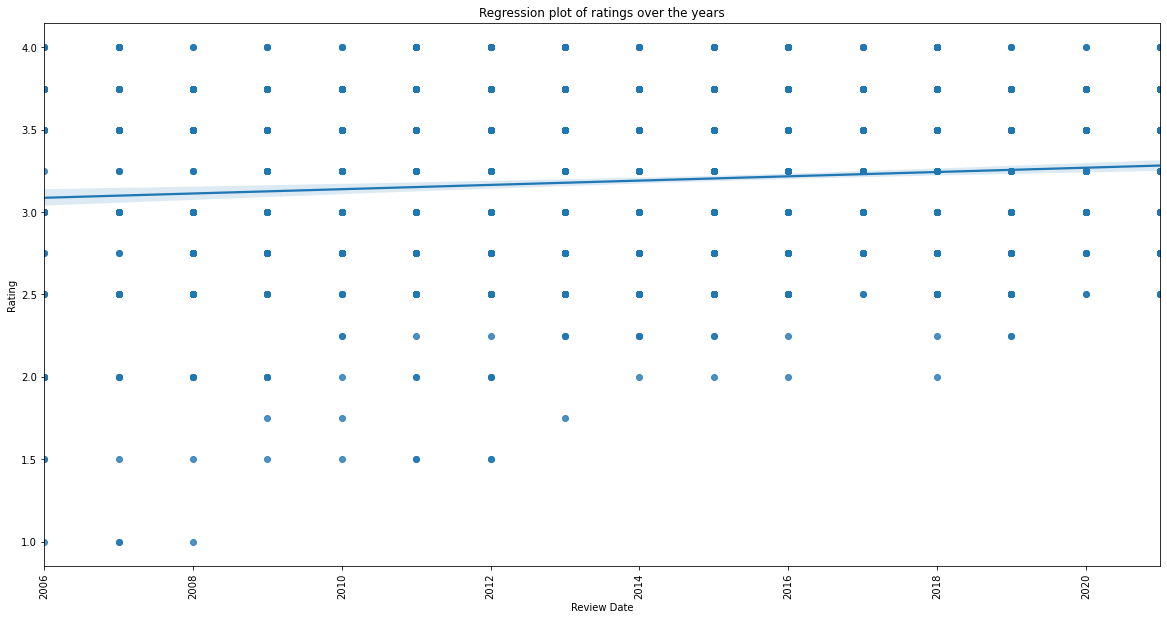

In [175]:
# does the year of rating influence the rating?
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.regplot(x='Review Date', y='Rating', data=ratings, ax=ax)
plt.ylabel('Rating')
plt.xticks(rotation = 90)
plt.xlabel('Review Date')
plt.title('Regression plot of ratings over the years')

# we observe no clear trend

In [176]:
# preprocessing the cocoa percentage
ratings['Cocoa Percent Int'] = ratings['Cocoa Percent'].str[:2].astype(int)
ratings['Cocoa Percent Int'][0]

76

Text(0.5, 1.0, 'Regplot of ratings for chocolate percentage')

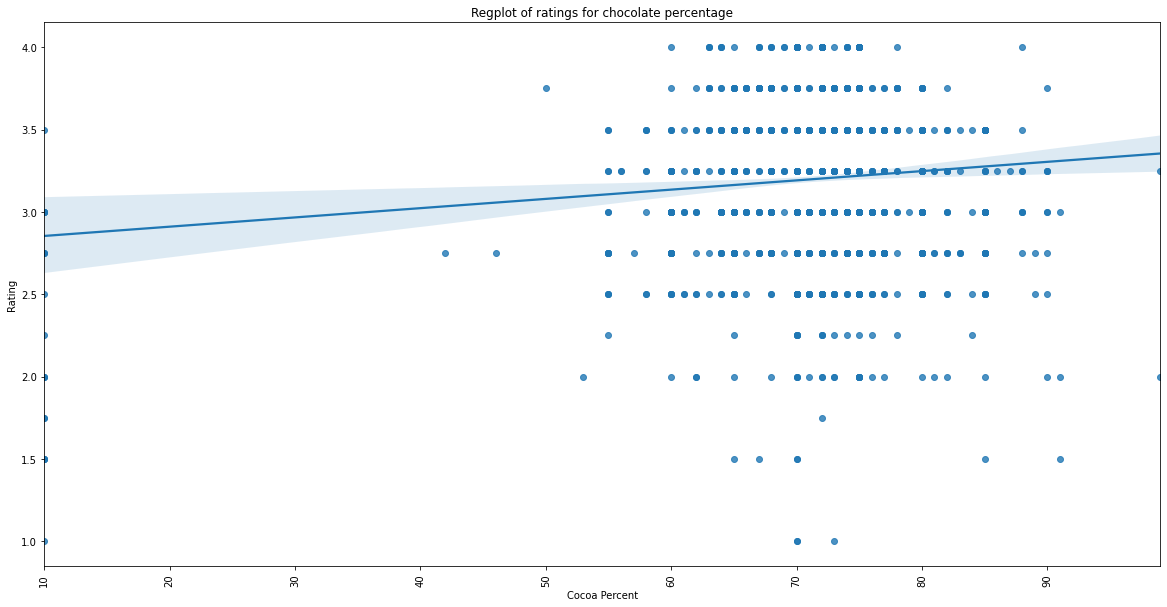

In [177]:
# does the cocoa percentage influence linearly the rating?

fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.regplot(x='Cocoa Percent Int', y='Rating', data=ratings, ax=ax)
plt.ylabel('Rating')
plt.xticks(rotation = 90)
plt.xlabel('Cocoa Percent')
plt.title('Regplot of ratings for chocolate percentage')

# we observe no clear trend

3


Text(0.5, 1.0, 'Regplot of ratings for number of ingredients')

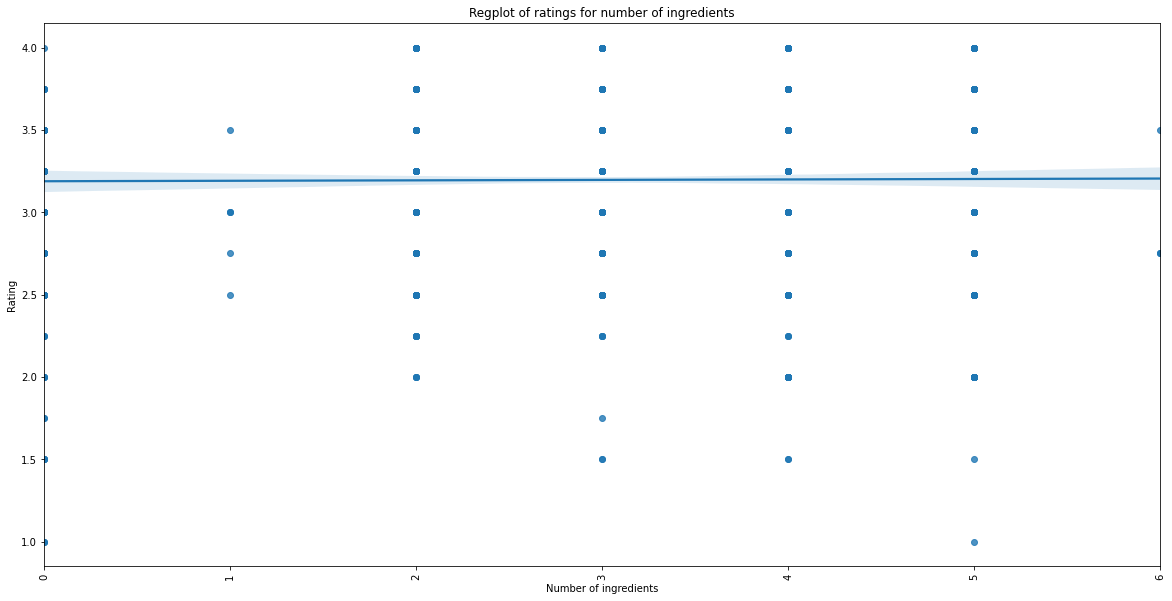

In [178]:
# preprocessing the number of ingredients (in the form 'number of ingredients - ingredient1, ingredient2')
ratings['Ingredients Count'] = [int(i[0]) for i in ratings['Ingredients'].fillna('0 - ').str.split('-')]
print(ratings['Ingredients Count'][0])

fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.regplot(x='Ingredients Count', y='Rating', data=ratings, ax=ax)
plt.ylabel('Rating')
plt.xticks(rotation = 90)
plt.xlabel('Number of ingredients')
plt.title('Regplot of ratings for number of ingredients')

# we observe no clear trend

Finally we see what ingredients and flavours appear most often.

In [179]:
# we map the ingredient abbreviations to their English name using the mapping from http://flavorsofcacao.com/chocolate_database.html (the original website)
abbrev2ingredient = {'B':'Beans', 'S':'Sugar', 'S*': 'Sweetener other than white cane or beet sugar', 'C':'Cocoa Butter', 
                    'V': 'Vanilla', 'L': 'Lecithin', 'Sa': 'Salt', '':''}

In [180]:
# preprocessing for the ingredients
ratings['Ingredients List'] = [i[1].strip().split(',') for i in ratings['Ingredients'].fillna('0 - ').str.split('-')]
ratings_explode = ratings.explode('Ingredients List').reset_index()
ratings_explode['Ingredients List'] = ratings_explode['Ingredients List'].apply(lambda x: abbrev2ingredient[x])

ratings_explode['Ingredients List'].value_counts()

Beans                                            2443
Sugar                                            2360
Cocoa Butter                                     1668
Lecithin                                          493
Vanilla                                           353
                                                   87
Sweetener other than white cane or beet sugar      76
Salt                                               37
Name: Ingredients List, dtype: int64

In [181]:
# preprocessing for the flavours
ratings['Most Memorable Characteristics List'] = ratings['Most Memorable Characteristics'].fillna(',').str.split(', ')
ratings_explode = ratings.explode('Most Memorable Characteristics List').reset_index()

# most common flavours
ratings_explode['Most Memorable Characteristics List'].value_counts()[:10]


sweet     264
nutty     259
cocoa     242
roasty    209
earthy    187
creamy    186
sandy     164
fatty     163
floral    143
spicy     138
Name: Most Memorable Characteristics List, dtype: int64